In [16]:
import pandas as pd
import numpy as np

In [26]:
# Step 1: Load the datasets
stations = pd.read_csv('../data/stations.csv')
station_hourly = pd.read_csv('../data/station_hour.csv')

In [27]:
# Split Datetime into Date and Time in station_hourly
station_hourly['Datetime'] = pd.to_datetime(station_hourly['Datetime'], errors='coerce')
station_hourly['Date'] = station_hourly['Datetime'].dt.date
station_hourly['Time'] = station_hourly['Datetime'].dt.time

In [28]:
# Merge station_hourly with stations on StationId
merged_data = pd.merge(station_hourly, stations, left_on='StationId', right_on='StationId', how='left')

In [29]:
# Impute missing values using mean for numeric columns
parameters = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
for param in parameters:
    merged_data[param] = merged_data[param].fillna(merged_data[param].mean())

In [30]:
# Add AQI Bucket based on AQI ranges
def get_aqi_bucket(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Satisfactory'
    elif aqi <= 200:
        return 'Moderate'
    elif aqi <= 300:
        return 'Poor'
    elif aqi <= 400:
        return 'Very Poor'
    else:
        return 'Severe'

merged_data['AQI_Bucket'] = merged_data['AQI'].apply(get_aqi_bucket)

In [31]:

# Select and reorder columns for the final dataset
final_columns = ['City', 'Date', 'Time'] + parameters + ['AQI_Bucket']
final_dataset = merged_data[final_columns]

In [32]:
# Export the final dataset to a CSV file
final_dataset.to_csv('final_dataset.csv', index=False)

print("Final dataset created and saved as 'final_dataset.csv'")

Final dataset created and saved as 'final_dataset.csv'


In [33]:
# Round off all numeric columns to 2 decimal places
final_dataset = final_dataset.round(2)

In [34]:
# Display the number of cities and their names
unique_cities = final_dataset['City'].unique()
print(f"Number of cities: {len(unique_cities)}")
print("Cities:", unique_cities)

Number of cities: 27
Cities: ['Amaravati' 'Visakhapatnam' 'Guwahati' 'Patna' 'Chandigarh' 'Delhi'
 'Ahmedabad' 'Gurugram' 'Jorapokhar' 'Bengaluru' 'Ernakulam' 'Kochi'
 'Thiruvananthapuram' 'Mumbai' 'Shillong' 'Bhopal' 'Aizawl' 'Brajrajnagar'
 'Talcher' 'Amritsar' 'Jaipur' 'Hyderabad' 'Chennai' 'Coimbatore'
 'Lucknow' 'Kolkata' nan]


In [35]:
# Display the number of columns per city
columns_per_city = final_dataset.groupby('City').size()
print("\nNumber of rows per city:")
print(columns_per_city)


Number of rows per city:
City
Ahmedabad               48192
Aizawl                   2680
Amaravati               22784
Amritsar                29269
Bengaluru              287564
Bhopal                   6903
Brajrajnagar            22468
Chandigarh               7263
Chennai                153648
Coimbatore               9229
Delhi                 1087388
Ernakulam                3852
Gurugram                67804
Guwahati                12002
Hyderabad              209831
Jaipur                  74032
Jorapokhar              28025
Kochi                    3854
Kolkata                 75717
Lucknow                146210
Mumbai                 131750
Patna                   64031
Shillong                 7402
Talcher                 22161
Thiruvananthapuram      29971
Visakhapatnam           35053
dtype: int64


In [36]:
# Remove cities with fewer than 10,000 rows
rows_per_city = final_dataset.groupby('City').size()
cities_to_keep = rows_per_city[rows_per_city >= 10000].index
final_dataset = final_dataset[final_dataset['City'].isin(cities_to_keep)]

# Display the updated number of rows per city
updated_rows_per_city = final_dataset.groupby('City').size()
print("\nUpdated number of rows per city (after filtering):")
print(updated_rows_per_city)


Updated number of rows per city (after filtering):
City
Ahmedabad               48192
Amaravati               22784
Amritsar                29269
Bengaluru              287564
Brajrajnagar            22468
Chennai                153648
Delhi                 1087388
Gurugram                67804
Guwahati                12002
Hyderabad              209831
Jaipur                  74032
Jorapokhar              28025
Kolkata                 75717
Lucknow                146210
Mumbai                 131750
Patna                   64031
Talcher                 22161
Thiruvananthapuram      29971
Visakhapatnam           35053
dtype: int64


In [37]:
# Round all numeric values to 2 decimal places
final_dataset = final_dataset.round(2)

# Remove cities with fewer than 10,000 rows
rows_per_city = final_dataset.groupby('City').size()
cities_to_keep = rows_per_city[rows_per_city >= 10000].index
final_dataset = final_dataset[final_dataset['City'].isin(cities_to_keep)]

# Overwrite the dataset by saving it back to the same file
final_dataset.to_csv('final_dataset.csv', index=False)

# Display the updated number of rows per city
updated_rows_per_city = final_dataset.groupby('City').size()
print("\nUpdated number of rows per city (after filtering):")
print(updated_rows_per_city)


Updated number of rows per city (after filtering):
City
Ahmedabad               48192
Amaravati               22784
Amritsar                29269
Bengaluru              287564
Brajrajnagar            22468
Chennai                153648
Delhi                 1087388
Gurugram                67804
Guwahati                12002
Hyderabad              209831
Jaipur                  74032
Jorapokhar              28025
Kolkata                 75717
Lucknow                146210
Mumbai                 131750
Patna                   64031
Talcher                 22161
Thiruvananthapuram      29971
Visakhapatnam           35053
dtype: int64


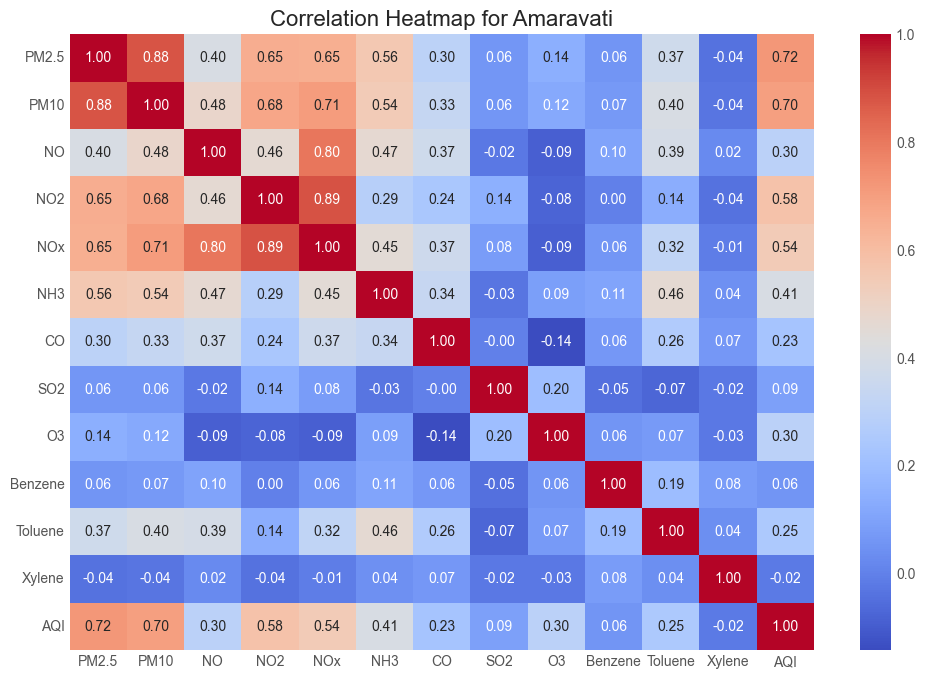

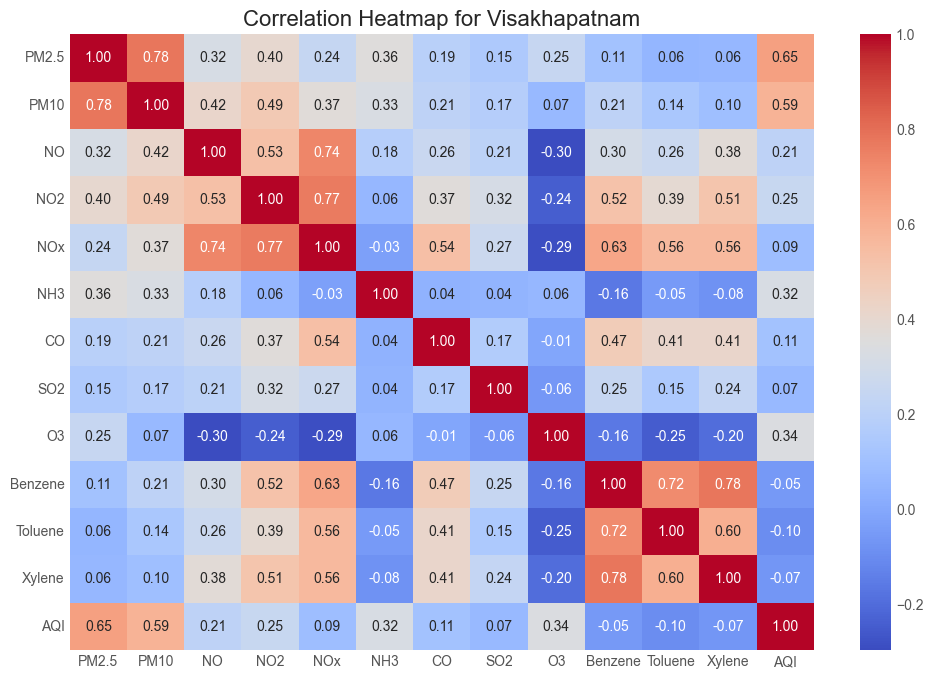

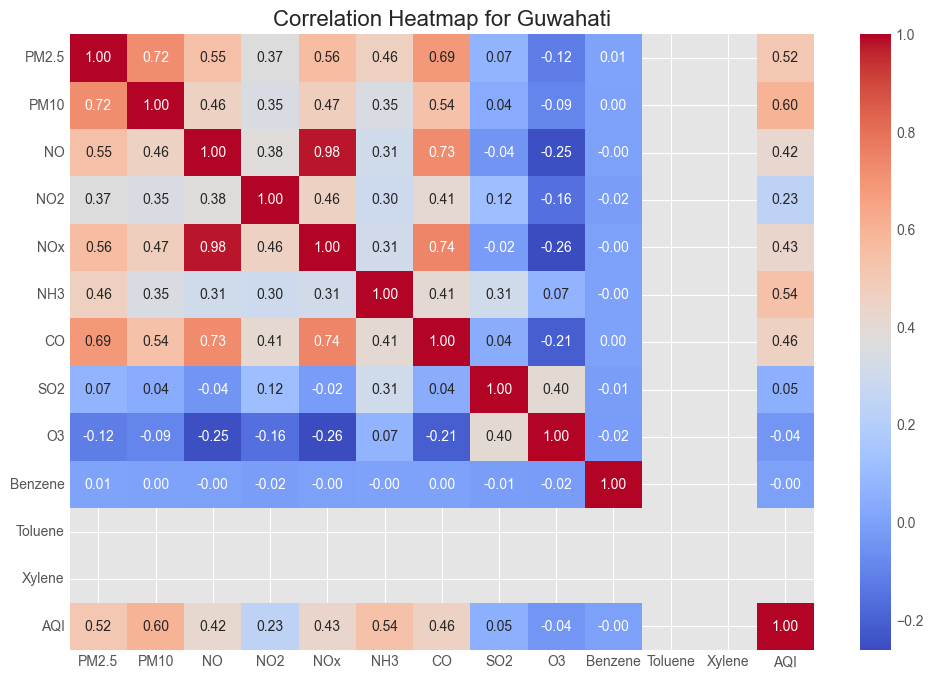

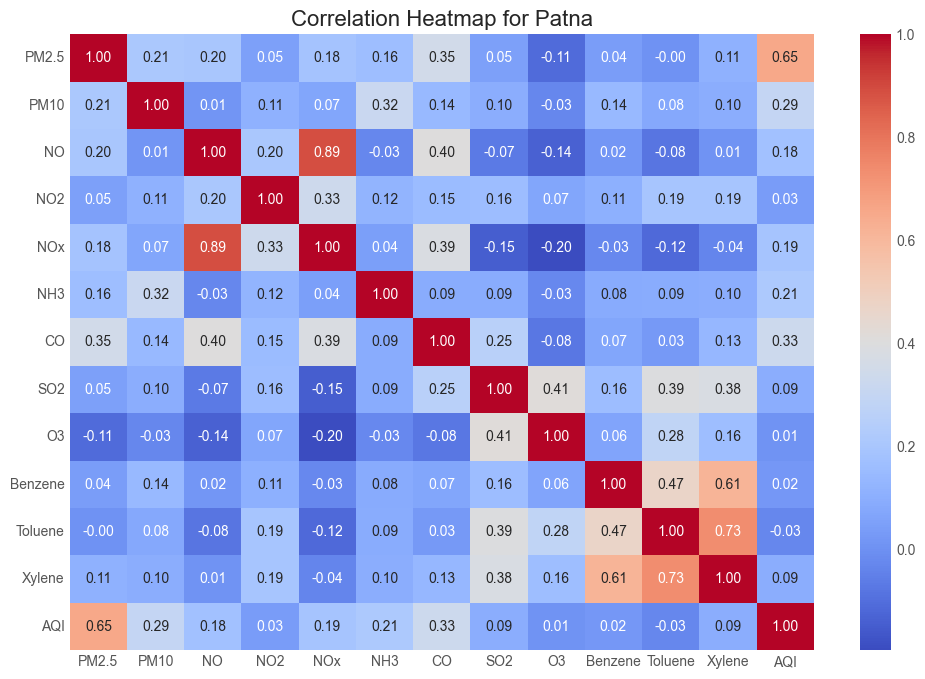

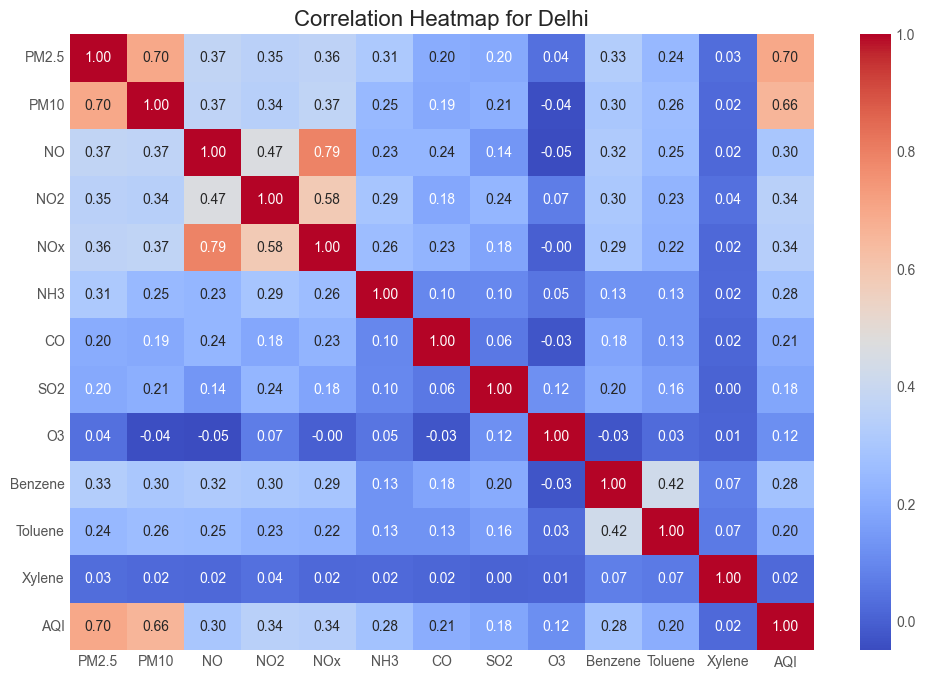

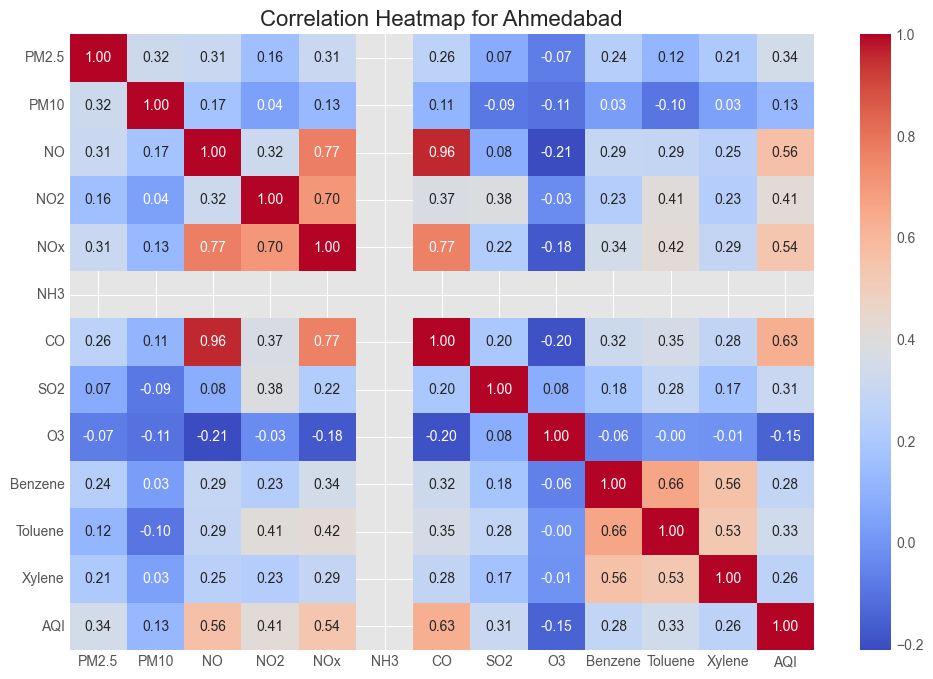

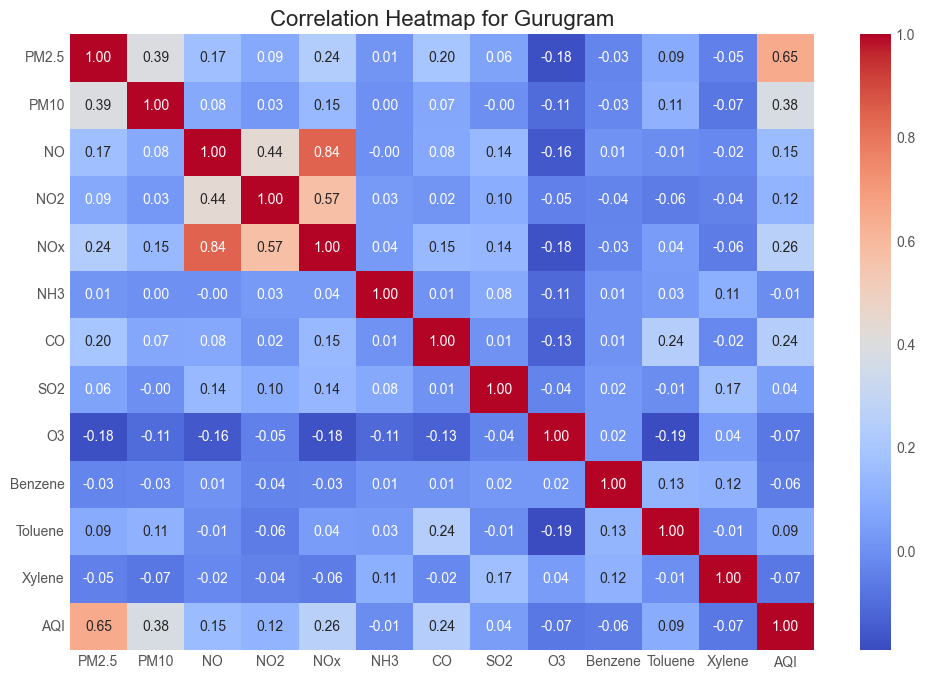

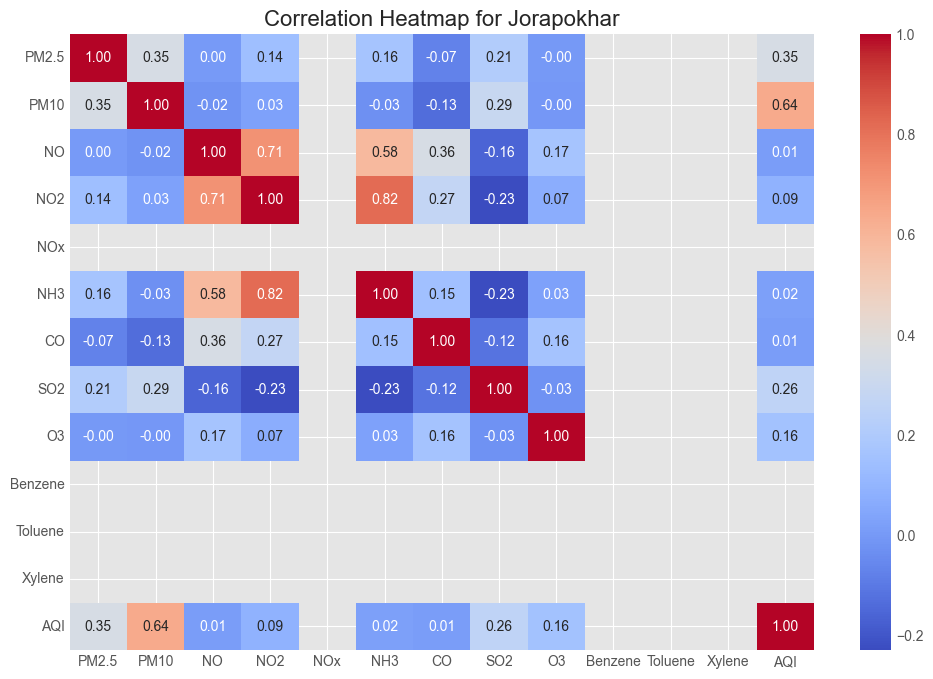

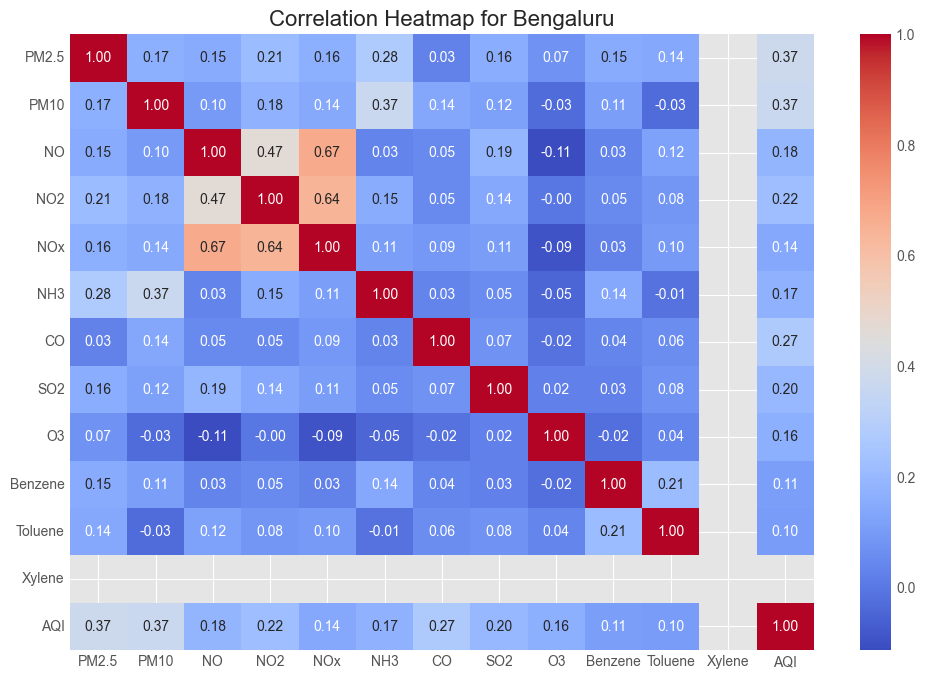

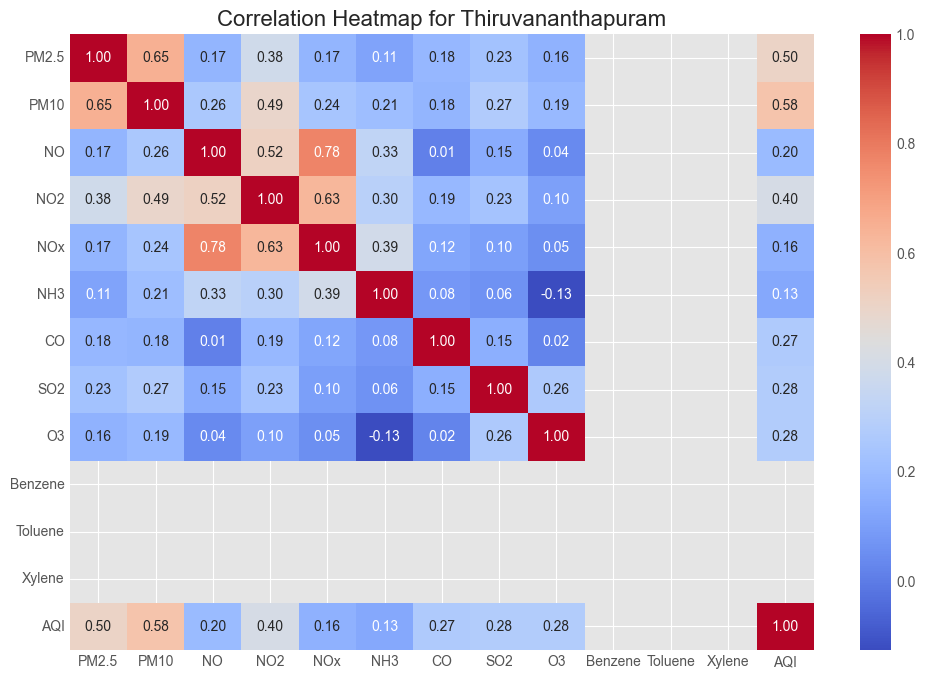

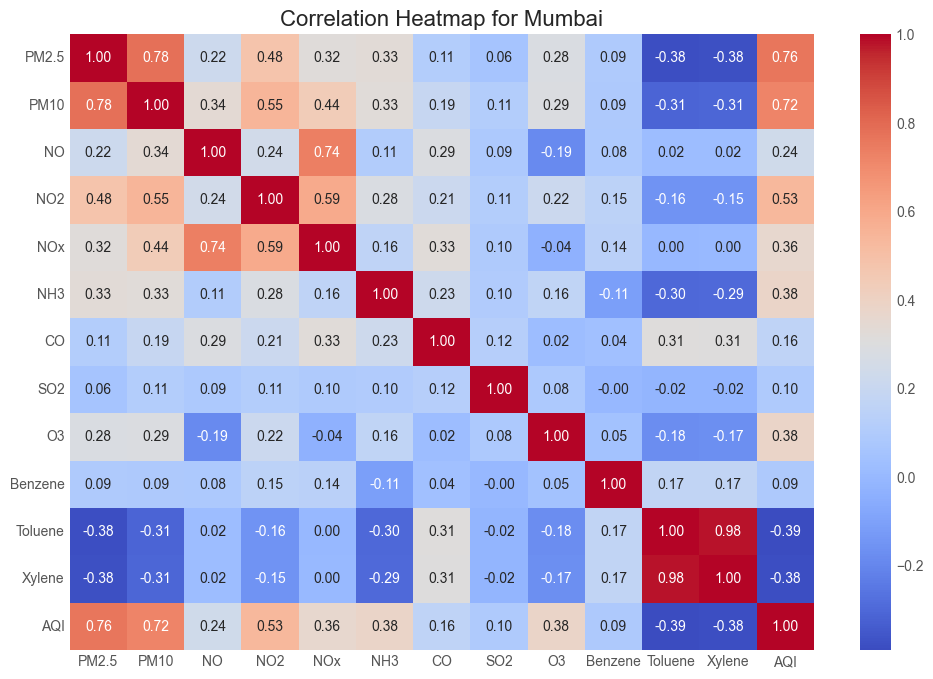

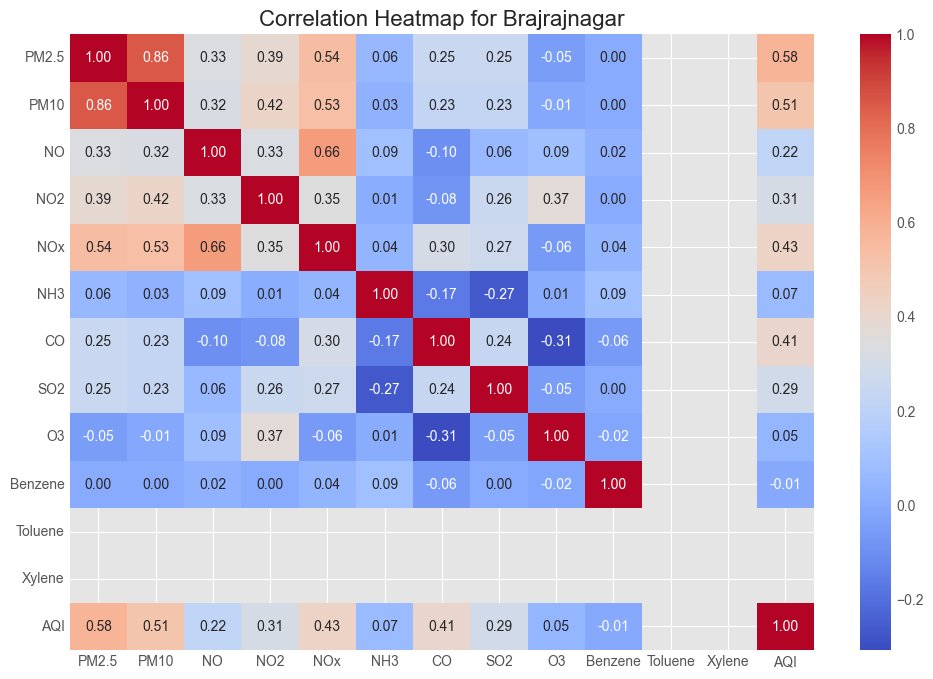

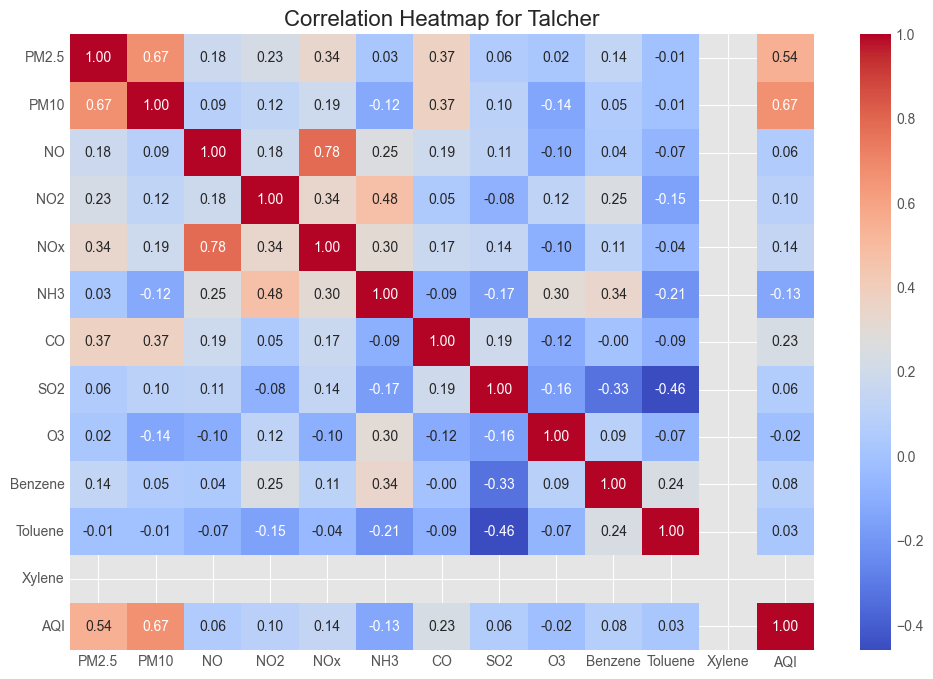

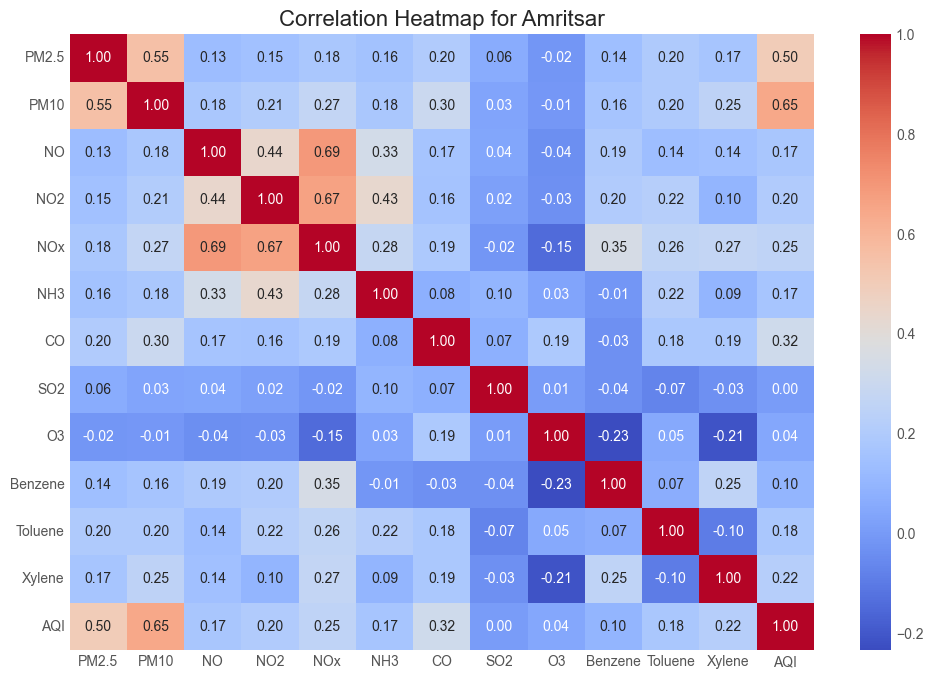

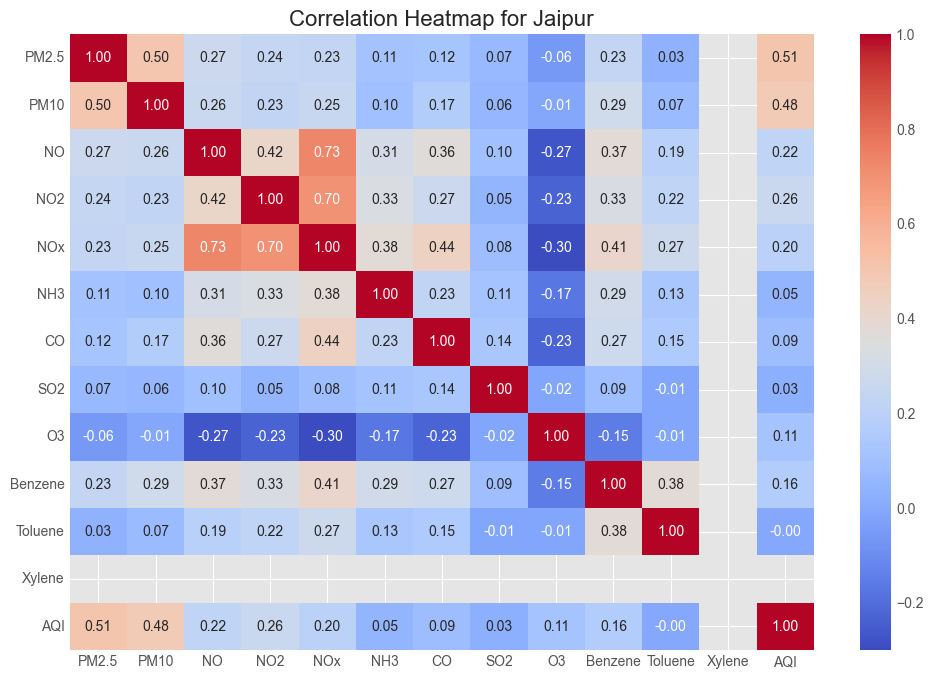

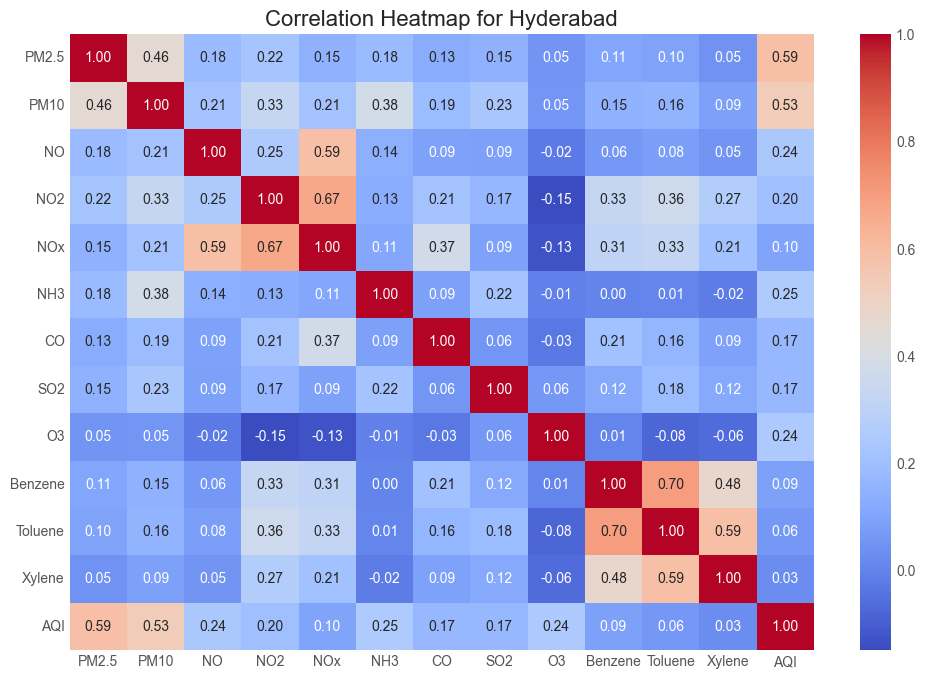

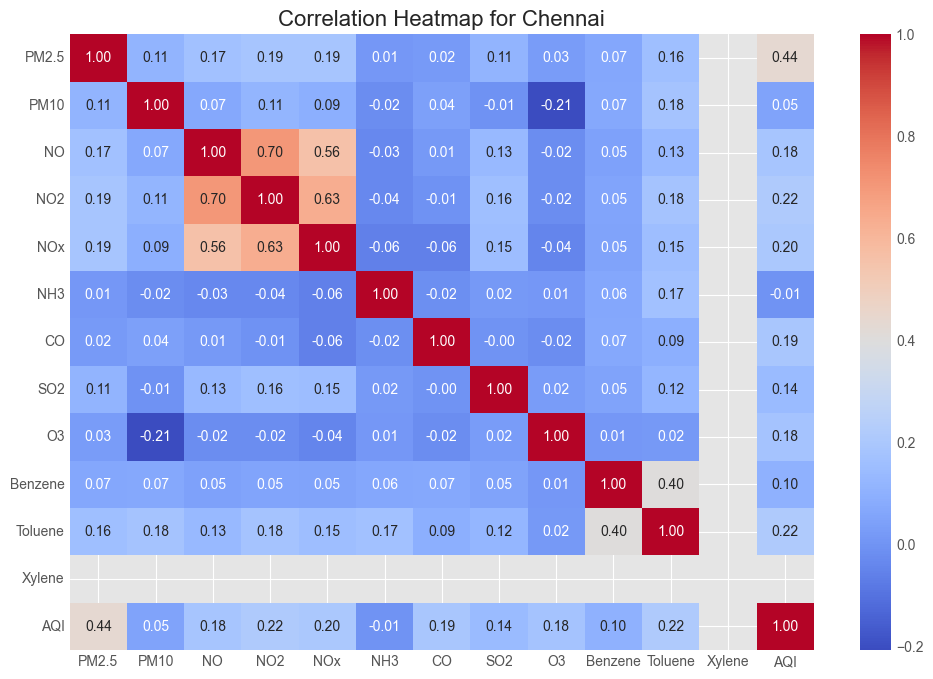

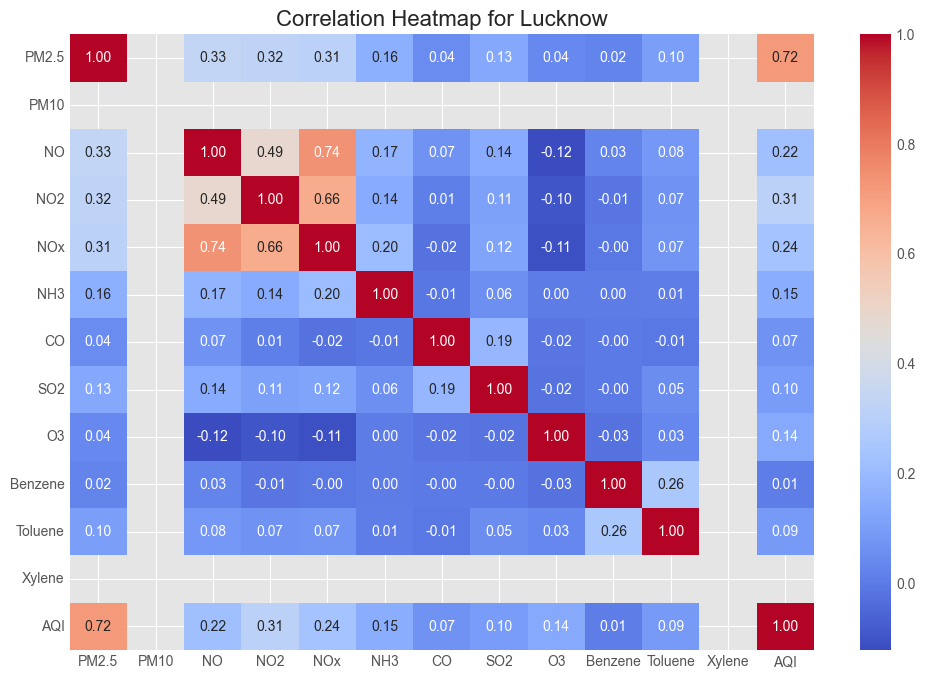

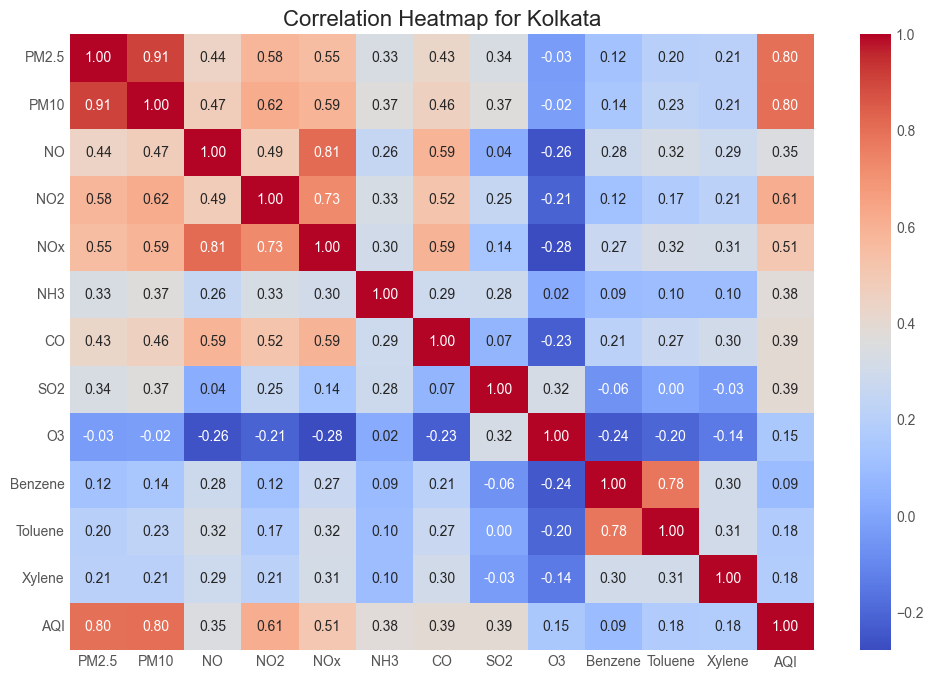

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the dataset by City and compute correlation matrices
cities = final_dataset['City'].unique()

for city in cities:
    # Filter data for the current city
    city_data = final_dataset[final_dataset['City'] == city]
    
    # Select only numeric columns for correlation computation
    numeric_data = city_data.select_dtypes(include=['float64', 'int64'])
    
    # Compute the correlation matrix
    correlation_matrix = numeric_data.corr()

    # Plot the heatmap for each city
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title(f"Correlation Heatmap for {city}", fontsize=16)
    plt.show()

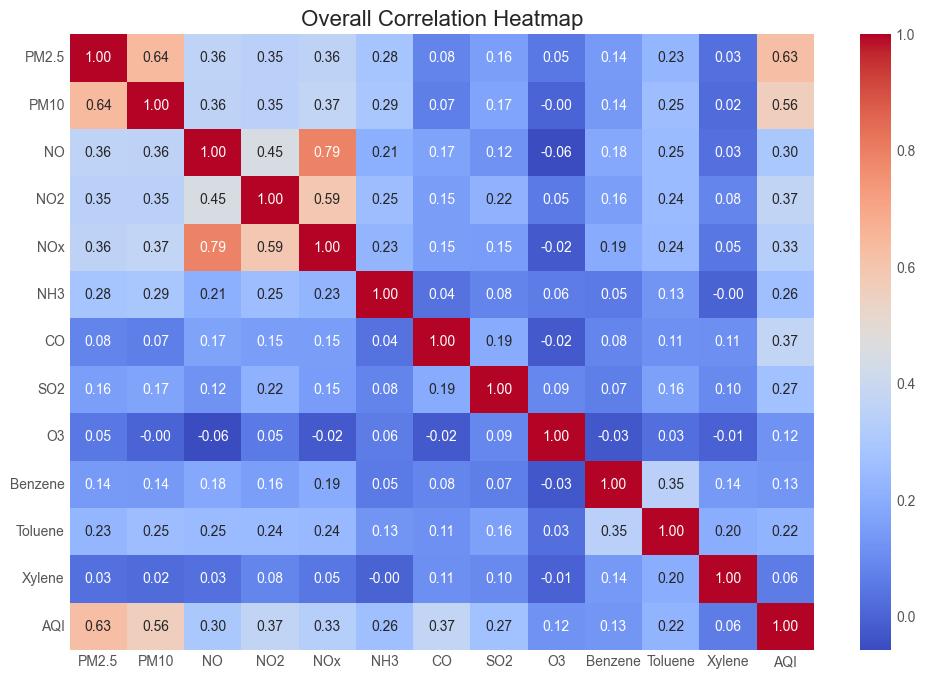

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation computation
numeric_data = final_dataset.select_dtypes(include=['float64', 'int64'])

# Compute the overall correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the overall heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Overall Correlation Heatmap", fontsize=16)
plt.show()

In [41]:
# Define the columns with low correlation to drop
low_correlation_columns = ['O3', 'SO2', 'NH3', 'Toluene', 'Benzene', 'Xylene']

# Drop the specified columns from the dataset
filtered_dataset = final_dataset.drop(columns=low_correlation_columns)

# Display the shape of the new dataset
print(f"New dataset shape: {filtered_dataset.shape}")

# Save the new dataset to a file if needed
filtered_dataset.to_csv('filtered_dataset.csv', index=False)

New dataset shape: (2547900, 11)


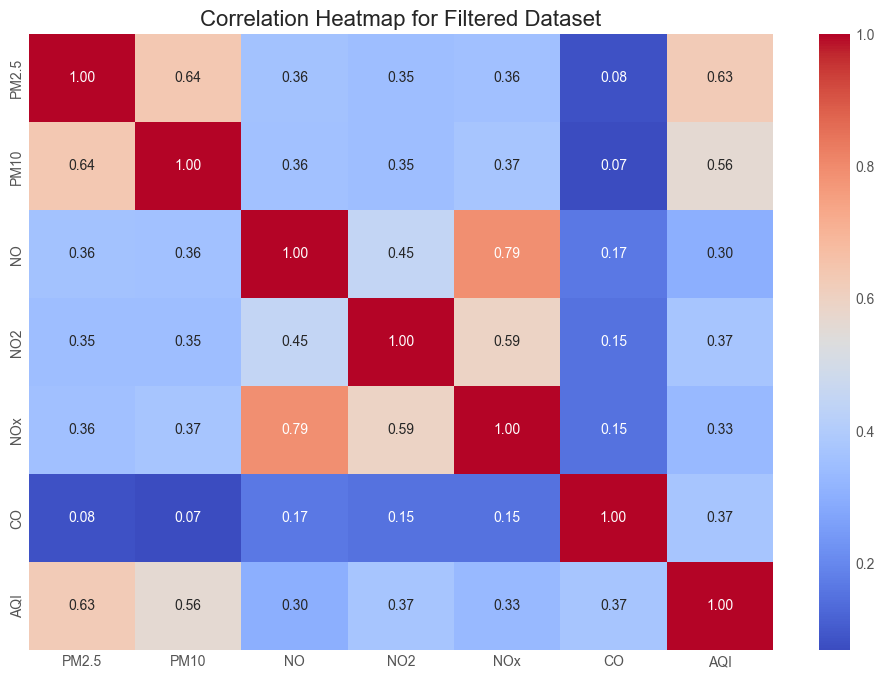

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns from the filtered dataset
numeric_data_filtered = filtered_dataset.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix for the filtered dataset
correlation_matrix_filtered = numeric_data_filtered.corr()

# Plot the heatmap for the filtered dataset
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_filtered, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap for Filtered Dataset", fontsize=16)
plt.show()